In [2]:
#import libraries

from neurodiffeq import diff      # the differentiation operation
from neurodiffeq.ode import solve # the ANN-based solver
from neurodiffeq.conditions import IVP   # the initial condition
from neurodiffeq.solvers import Solver1D
from neurodiffeq.ode import solve_system
from neurodiffeq.monitors import Monitor1D
from neurodiffeq.callbacks import MonitorCallback
import numpy as np
import torch
import matplotlib.pyplot as plt

ts = np.linspace(0,40.0,100)
ts = ts.reshape(-1,1)
ts = torch.from_numpy(ts)

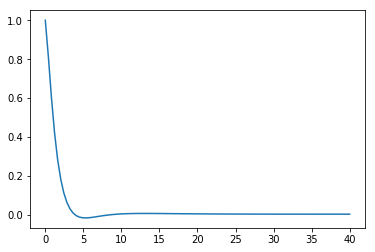

In [3]:
# Declare a solver for simple population equation. Fit the solver for only a 100 epochs as we need to continue training later.

simple_ode = lambda u,t : [diff(u,t) + u]

init = [IVP(t_0=0.0, u_0=1.0)]

solver = Solver1D(
    ode_system=simple_ode,
    conditions=init,
    t_min=0.1,
    t_max=12.0,)

solver.fit(max_epochs=100)

soln = solver.get_solution()

plt.plot(ts,soln(ts).detach().numpy())
plt.show()

## Testing save/load through solver methods

In [5]:
#Call the save method on the instance of solver

solver.save('test_file')

In [6]:
#Call the load on the solver class and not on the instance

solver_new = Solver1D.load('test_file')

**Plot before and after loading plots for solution**

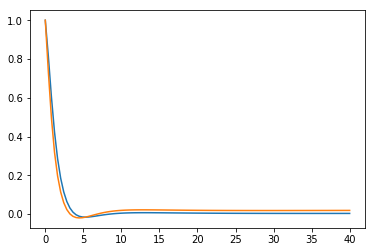

In [7]:
# Fit for another 100 epochs and plot the before and after results to check if training continued

solver_new.fit(max_epochs = 100)
soln_new_post = solver_new.get_solution()
plt.plot(ts,soln(ts).detach().numpy())
plt.plot(ts,soln_new_post(ts).detach().numpy())

## Using the save/load functions to save complete solver object

In [8]:
#import the save_solver and load_solver functions

from neurodiffeq.solvers_utils  import save_solver
from neurodiffeq.solvers_utils  import load_solver

save_solver(solver,'solver_save')

In [9]:
#Load the saved solver from the file

solver_load = load_solver('solver_save')

In [10]:
#Check if its the same solver

print(solver_load.get_internals()['global_epoch'])

100


**Continue training and get plot**

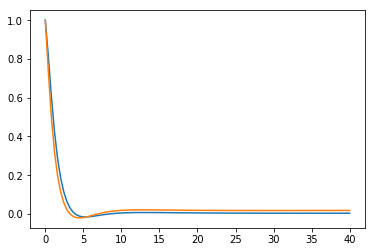

In [11]:
#Do the same as was done for the save/load by methods

solver_load.fit(max_epochs = 100)
soln_load = solver_load.get_solution()
plt.plot(ts,soln(ts).detach().numpy())
plt.plot(ts,soln_load(ts).detach().numpy())